In [8]:
import sys
import os
# Adds the project root directory to the Python path.
# The notebook is in 'Examples/pde', so we need to go up two levels
project_root = os.path.abspath('../..')
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [9]:
from pysymmetry import *
import matplotlib.pyplot as plt
import numpy as np

font = {'family': 'serif', 'serif': ['Computer Modern Roman'], 'size': 16}
plt.rc('font', **font)
plt.rc('text', usetex=True) # Use LaTeX for rendering text
plt.rc('lines', linewidth=2.5, markersize=8)
plt.rc('axes', grid=True)
plt.rc('grid', linestyle='--', alpha=0.6)

In [10]:
def generators2d(n):#Nota:temporario

    string_reflexao_sigma = ''
    for j in range(1,(n/2+1).floor()):
        for k in range(0,n):
            string_reflexao_sigma = string_reflexao_sigma + str((k*n+j,k*n+n-j+1))
    
    string_reflexao_miDp = ''
    for i in range(1, n):
        for j in range(i+1, n+1):            
            string_reflexao_miDp = string_reflexao_miDp + str(((i-1)*n+j,(j-1)*n+i))
            
    return [string_reflexao_sigma, string_reflexao_miDp]

In [11]:
n = 10
M = laplacian2d(n)
G = nGroup(generators2d(n))
gens = G.gens()
img = [g.matrix() for g in gens]
r = G.nrepresentation(gens, img)
base = G.nbase_change_reduction(r)
blocks = base.get_blocks(M)

In [12]:
eigvals2d = []
for i, b in enumerate(blocks):
    v = np.linalg.eigvals(b.toarray())
    eigvals2d.append(v)
    mult = base._info[i][0]
    if mult>1:
        for j in range(mult-1):
            eigvals2d.append(v)    
eigvals2d = sorted(np.concatenate(eigvals2d))

In [13]:
full_matrix2d = sorted(np.linalg.eigvalsh(M.toarray()))

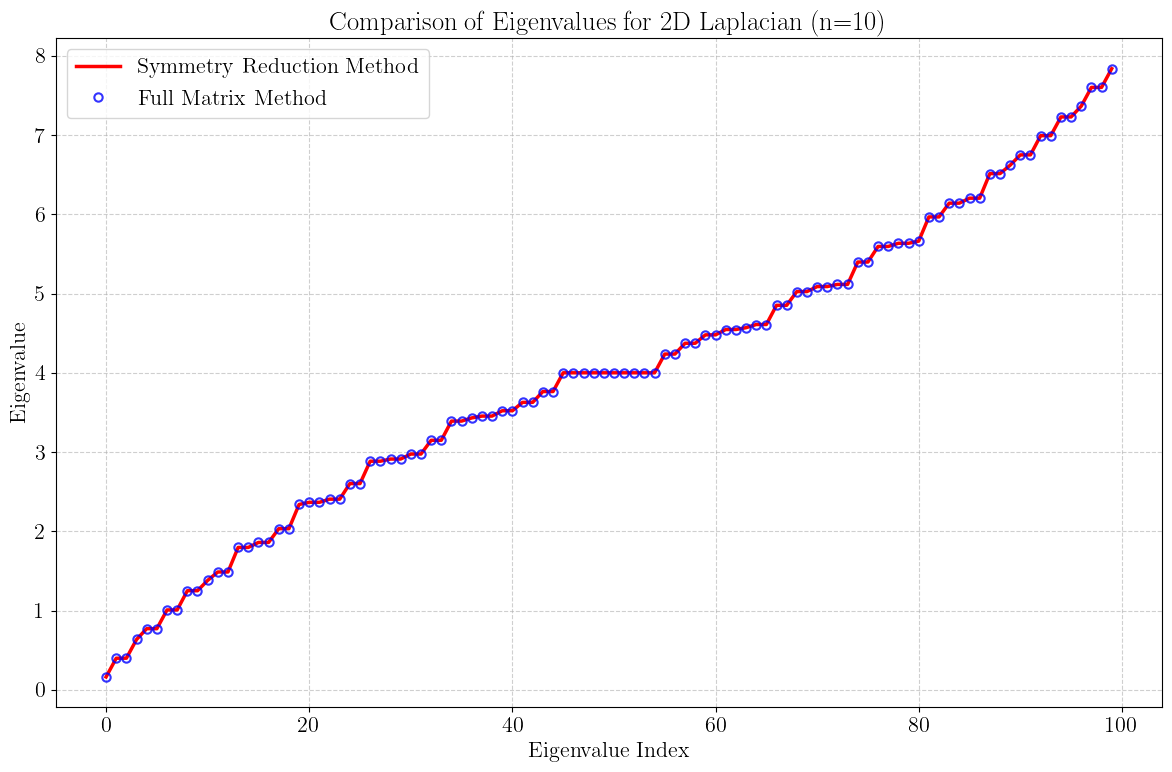

In [14]:
# --- Plotting the Eigenvalue Comparison ---
# Create the plot with a professional size
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the block reduction results as a solid red line
ax.plot(eigvals2d, color='red', label='Symmetry Reduction Method')

# Plot the full matrix results as hollow blue circles on top
# This visually confirms that the values are identical
ax.plot(full_matrix2d, 'o', label='Full Matrix Method',
        markerfacecolor='none', markeredgecolor='blue', alpha=0.8,
        markersize=6, markeredgewidth=1.5)

# Set labels and title (font sizes are now handled by plt.rc)
ax.set_xlabel('Eigenvalue Index')
ax.set_ylabel('Eigenvalue')
ax.set_title('Comparison of Eigenvalues for 2D Laplacian (n=10)')
ax.legend()

# Ensure tight layout and display the plot
plt.tight_layout()
plt.show()